# 

In [11]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#read in the data
osnaca = pd.read_excel("../data/osnaca-data.xlsx",sheet_name="Data")
osnaca_conclurry = pd.read_excel("../data/osnaca-data.xlsx",sheet_name="Cloncurry Supplement")
osnaca_metadata_sheet1 = pd.read_excel("../data/osnaca-metadata.xlsx",sheet_name="Ore samples")

In [13]:
osnaca.head(2)

,Sample,Code,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,...,Y,Zn,B,Hf,Si,Zr,Be,Ga,Ge,Wt Tot
0,700001,NaN,0.438,0.002,0.002,0.362,10.6,0.02,0.39,91.5,...,1.2,153000,-20,0.4,34200,60,-1.0,11.0,1,159
1,700002,NaN,0.093,0.001,0.002,0.095,125.0,0.22,0.12,44.0,...,18.5,3780,-20,0.2,114000,20,-1.0,2.0,-1,143


In [14]:
osnaca_metadata_sheet1.head(2)

,OSNACA Number,SAMPLE CODE,Deposit Name,Donor,Three Character Code,Country,State,Class,Sub Class,Your Sample ID,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Mn %,Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,700001.0,NaN,Woodlawn,Carl Brauhart,WLN,Australia,New South Wales,VHMS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [15]:
# Remove to avoid confusion of column similarity to `Sample` from osnaca.
osnaca_metadata_sheet1 = osnaca_metadata_sheet1.drop(columns=['SAMPLE CODE'])
# Rename to make merging cleaner.
osnaca_metadata_sheet1.rename(columns={'OSNACA Number': 'Sample',
                                      'LAT (WGS84) ddd.ddd': 'LAT',
                                      'LONG (WGS84) ddd.ddd': 'LONG'}, inplace=True)
# Merge the Class feature onto osnaca data.
osnaca = osnaca.merge(osnaca_metadata_sheet1[['Sample','Class', 'LAT', 'LONG', 'State']], on='Sample')

osnaca.head(3)

,Sample,Code,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,...,Si,Zr,Be,Ga,Ge,Wt Tot,Class,LAT,LONG,State
0,700001,NaN,0.438,0.002,0.002,0.362,10.6,0.02,0.39,91.5,...,34200,60,-1.0,11.0,1,159,VHMS,-35.062625,149.569996,New South Wales
1,700002,NaN,0.093,0.001,0.002,0.095,125.0,0.22,0.12,44.0,...,114000,20,-1.0,2.0,-1,143,VHMS,-35.062625,149.569996,New South Wales
2,700003,NaN,1.41,0.002,0.002,1.39,120.0,0.02,62.9,215.0,...,71500,-10,-1.0,-1.0,2,204,VHMS,-41.841336,145.515162,Tasmania


In [16]:
osnaca[osnaca['State'] == 'Western Australia']

,Sample,Code,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,...,Si,Zr,Be,Ga,Ge,Wt Tot,Class,LAT,LONG,State
4,700005,NaN,2.9,0.003,0.005,3.94,0.34,0.06,4.01,162.00,...,142000,-10,-1.0,-1.0,2,280,VHMS,-28.777512,116.963014,Western Australia
5,700006,NaN,0.147,-0.001,0.001,0.122,0.08,0.04,5.87,407.00,...,162000,-10,-1.0,-1.0,8,156,VHMS,-28.777512,116.963014,Western Australia
6,700007,NaN,12.6,-0.001,0.002,11.5,0.70,0.04,4.45,614.00,...,23700,-10,-1.0,1.0,19,230,VHMS,-28.777512,116.963014,Western Australia
10,700011,NaN,0.166,-0.001,-0.001,0.129,7.90,-0.02,3.79,72.00,...,18300,20,-1.0,24.0,5,175,VHMS,-28.744459,116.945039,Western Australia
11,700012,NaN,0.992,-0.001,0.001,1.12,6.80,-0.02,2,96.50,...,18900,20,-1.0,6.0,3,141,VHMS,-28.744459,116.945039,Western Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,701168,NaN,16.7,0.004,0.008,13.8,1.06,4.08,0.05,1.00,...,322000,80,0.4,7.4,1,NaN,Orogenic - Intrusion Related Au,-31.533513,119.678058,Western Australia
1134,701169,1,0.045,-0.001,-0.001,0.003,0.14,0.08,0.06,0.10,...,66100,70,0.3,0.8,1,NaN,Orogenic - Intrusion Related Au,-31.533513,119.678058,Western Australia
1135,701170,1,0.083,-0.001,-0.001,0.078,0.08,0.14,0.08,0.10,...,362000,90,0.9,11.6,1,NaN,Orogenic - Intrusion Related Au,-28.670551,121.165269,Western Australia
1136,701171,1,0.041,0.004,0.004,0.034,0.08,0.96,0.06,0.15,...,191000,20,0.3,5.4,1,NaN,Orogenic - Intrusion Related Au,-28.670551,121.165269,Western Australia


## VHMS Deposit data
**Volcanogenic massive sulfide ore deposit** <br>
Volcanogenic massive sulfide ore deposits, also known as VMS ore deposits, are a type of metal sulfide ore deposit, mainly copper-zinc which are associated with and created by volcanic-associated hydrothermal events in submarine environments.

In [17]:
osnaca_vhms = osnaca[(osnaca['Class'] == 'VHMS')]
osnaca_vhms.shape

(134, 73)

In [18]:
osnaca_vhms = osnaca_vhms.drop(['Code', 'Wt Tot', 'Sample'], axis=1)

In [19]:
osnaca_vhms

,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,Al,As,...,Hf,Si,Zr,Be,Ga,Ge,Class,LAT,LONG,State
0,0.438,0.002,0.002,0.362,10.60,0.02,0.39,91.5,2700,318,...,0.4,34200,60,-1.0,11.0,1,VHMS,-35.062625,149.569996,New South Wales
1,0.093,0.001,0.002,0.095,125.00,0.22,0.12,44.0,26300,75,...,0.2,114000,20,-1.0,2.0,-1,VHMS,-35.062625,149.569996,New South Wales
2,1.41,0.002,0.002,1.39,120.00,0.02,62.9,215.0,100,4820,...,-0.2,71500,-10,-1.0,-1.0,2,VHMS,-41.841336,145.515162,Tasmania
3,0.096,0.003,0.005,0.086,0.72,0.80,0.03,2.5,37800,11,...,2.0,244000,70,-1.0,-1.0,-1,VHMS,-13.97526,-49.177603,Goiás
4,2.9,0.003,0.005,3.94,0.34,0.06,4.01,162.0,19600,1010,...,-0.2,142000,-10,-1.0,-1.0,2,VHMS,-28.777512,116.963014,Western Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.106,-0.001,-0.001,0.105,3.28,0.14,19.6,36.5,600,1530,...,0.2,75800,30,-0.1,24.0,4,VHMS,48.689316,-81.365755,Ontario
1125,0.009,-0.001,-0.001,0.022,9.12,0.12,1.37,113.0,21000,189,...,4.8,175000,120,0.3,9.0,3,VHMS,48.689316,-81.365755,Ontario
1126,0.097,0.001,0.003,0.12,261.00,0.34,0.5,70.5,32600,1650,...,2.0,116000,100,0.7,24.6,3,VHMS,-28.483949,121.169987,Western Australia
1127,0.401,-0.001,-0.001,0.491,4.44,0.10,19.7,89.0,2400,734,...,0.6,20300,50,-0.1,38.8,32,VHMS,-28.483949,121.169987,Western Australia


## GeoPy
We want to find if there are data points close in distance between OSNACA VHMS data and the WAMEX data, perhaps then we will be able to infer that the close WAMEX points are also VHMS deposits.

- Set minimum distance threshold
- Compare each osnaca_vhms long, lat to each long, lat of WAMEX data. 

In [26]:
# Combining Lat and Long into tuples as geopy expects.
osnaca_vhms['coords'] = list(zip(osnaca_vhms['LAT'], osnaca_vhms['LONG']))

In [28]:
import geopy.distance

# def print_dist(row):
#     dist = geopy.distance.distance(osnaca_vhms['coords'][0], row['coords']).km
#     print(dist)
    
# osnaca_vhms.apply(print_dist, axis=1)

In [29]:
wamex_rc = pd.read_csv('../data/WAMEX_1_Rockchip_Original.csv')
wamex_rc.head()

/home/franticoreo/miniconda3/envs/minerals/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,OBJECTID,DATASET,SAMPLEID,GSWANO,EXTRACT_DA,BATCH_NO,QMAPID,DLAT,DLONG,EASTING,...,W_ppm,WO3_ppm,Y_ppm,Y2O3_ppm,Yb_ppm,Yb2O3_ppm,Zn_ppm,ZnO_ppm,Zr_ppm,ZrO2_ppm
0,1,NaN,229866,NaN,NaN,NaN,NaN,-34.048839,118.176663,NaN,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,2,NaN,229867,NaN,NaN,NaN,NaN,-34.048839,118.176663,NaN,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,3,NaN,229868,NaN,NaN,NaN,NaN,-34.048839,118.176663,NaN,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,4,NaN,229869,NaN,NaN,NaN,NaN,-34.048839,118.176663,NaN,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,5,NaN,229870,NaN,NaN,NaN,NaN,-34.048839,118.176663,NaN,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [30]:
wamex_rc.shape

(402770, 143)

what is the best way to compare variable length tuple pairs

extract datasets tuple pairs, enumerate them, calc dist.

In [31]:
osnaca_vhms_coords = list(zip(osnaca_vhms['LAT'], osnaca_vhms['LONG']))

wamex_coords = list(zip(wamex_rc['DLAT'], wamex_rc['DLONG']))

In [33]:
def is_less_than_max_dist(coords_a, coords_b, max_dist=100):
    if geopy.distance.distance(coords_a, coords_b).km < max_dist:
        return True
# iterate over each osnaca_vhms_coord, iter over wamex_coords if dist match return wamex_coord loop index.

wamex_close_coords = []

for os in osnaca_vhms_coords:
    for idx, wa in enumerate(wamex_coords):
        if is_less_than_max_dist(os, wa):
            wamex_close_coords.append(idx)

In [36]:
wamex_close_coords

396796

In [39]:
import pickle

with open('./wamex_close_coords.pickle', 'wb') as file:
    pickle.dump(wamex_close_coords, file)

In [40]:
!ls

 init.txt	     Osnaca_RF-Copy1.ipynb   wamex_close_coords.pickle
'OSNACA EDA.ipynb'   test.txt		    'WAMEX EDA.ipynb'


In [41]:
with open('./wamex_close_coords.pickle', 'rb') as file:
    x = pickle.load(file)

In [43]:
len(x), len(set(x))

(396796, 86411)

### Hmmm. could you predict VHMS?

## Data Cleaning

Remove Na values for RF regressor

Deal with negative values, by converting it to half the absolute value

In [ ]:
# IS values in dataset need to be converted to Na values



In [53]:
#missing values need to be removed, Code and Wt Tot columnns can be removed as they aren't useful features, meaning 72 rows will be removed
osnaca_all.isna().sum()[osnaca_all.isna().sum() > 0]

Code       994
Au (AR)     72
Wt Tot     617
dtype: int64

In [54]:
#drop code and wt tot columns
#drop sample column as it is not a useful feature
osnaca_all2 = osnaca_all.drop(['Code', 'Wt Tot', 'Sample'], axis=1)
osnaca_all2.isna().sum()[osnaca_all2.isna().sum() > 0]

Au (AR)    72
dtype: int64

In [55]:
#remove values that are 'IS'
osnaca_all2=osnaca_all2[osnaca_all2 != 'IS']

C:\Users\caley\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [56]:
#drop 72 rows
osnaca_all2 = osnaca_all2.dropna()
osnaca_all2.isna().sum()[osnaca_all2.isna().sum() > 0]

Series([], dtype: int64)

In [57]:
#1135 rows remain
osnaca_all2.shape

(1135, 66)

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor


#split dataset into features and output variable
X = osnaca_all2.drop(['Ge'], axis=1)
y = osnaca_all2['Ge']

In [59]:
#split data into train and test set
import sklearn.model_selection as selection

X_train, X_test, y_train, y_test = selection.train_test_split(X, y, test_size = 0.25, random_state = 0)

In [65]:
#specify regression model
regressor = RandomForestRegressor(n_estimators=500, random_state=0)


In [66]:
#fit to training data 
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [67]:
#predictions for training and test data set
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)


In [68]:
#evaluating random forest
from sklearn import metrics
print('Training Error')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print("")

print('Testing Error')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Training Error
Mean Absolute Error: 2.0208813160987074
Mean Squared Error: 43.21029721739131
Root Mean Squared Error: 6.573453979255602

Testing Error
Mean Absolute Error: 5.278190140845071
Mean Squared Error: 146.1675745774648
Root Mean Squared Error: 12.089978270347089


## Feature Importances

In [79]:
#Feature importances
for name, score in zip(X_train.columns, regressor.feature_importances_):
    print(name, score)

Au (FA) 0.009416745201942113
Pt 0.0006522822087701138
Pd 0.0010509083890617185
Au (AR) 0.010886407475641955
Bi 0.009993254328143087
Te 0.004722904481260628
Hg 0.007312842569380792
Ag 0.007802244142129938
Al 0.003306072780281539
As 0.005533311448606364
Ca 0.015390499885901295
Cd 0.01405961957713294
Co 0.009186939226017172
Cr 0.00018349778465703978
Cs 0.01794279470013903
Cu 0.011772963578558924
Fe 0.006965527362297047
In 0.005072315994729995
K 0.003526032939331672
La 0.016648918386921008
Ce 0.015471218906090153
Pr 0.004161739625463887
Nd 0.01113976754179891
Sm 0.008586144168293319
Eu 0.0020389861837726312
Gd 0.0016060532342978071
Tb 0.0008211096375496304
Dy 0.0014752833688117504
Ho 0.0008267622526913856
Er 0.0007552121173642071
Tm 0.0008514221639139176
Yb 0.0031175471762092113
Lu 0.004205435095077924
Li 0.008175589224526245
Mg 0.009339288909145062
Mn 0.020361304210521087
Mo 0.007529666727310663
Na 0.003433766687449599
Nb 0.001485249258580049
Ni 0.004958409351773244
P 0.002052780312000724

In [99]:
# Visualising some predictions

# model predictions
xt = X_train[:50]
pred1 = regressor.predict(xt)

In [100]:
#true values
xt_test = np.array(y_train[:50])
xt_test

array([ 2,  1,  4, -1,  2, 14, 20, 46, -1,  3, -1,  2,  2,  3,  2,  3,  3,
        4, -1,  3,  4,  2, 43,  1,  2,  1,  1,  3,  2, 67,  2,  6,  3,  1,
        1, -1,  2,  3, 83,  1,  6,  5,  1, -1,  2, 30,  1, 55, -1,  3],
      dtype=int64)

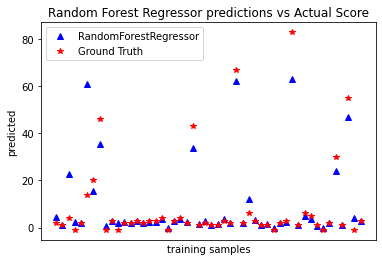

In [101]:
plt.figure()
plt.plot(pred1, 'b^', label = 'RandomForestRegressor')
plt.plot(xt_test, 'r*', label = 'Ground Truth')

plt.tick_params(axis='x', which = 'both', bottom = False, top=False, labelbottom=False)

plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc='best')
plt.title('Random Forest Regressor predictions vs Actual Score')
plt.show()